
# <p style="text-align: center;">EE 461P: Data Science Principles</p>
# <p style="text-align: center;">Assignment 4</p>
## <p style="text-align: center;">Total points: 65</p>
## <p style="text-align: center;">Due: Tuesday, November 13th, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  **Please include the name and UTEID for both students on all submitted files (including this notebook).** In addition, please convert **your filename including your EID** (ex. ss324.jpynb or ss324_mj345.jpypb).

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Question 0 - Bayes Decision Theory (10pts)
(From HW3)

#### a. (2pts) Explain what you understand by class-conditional likelihood, class priors, and posterior probability of a class given an input, and the relationship between them. Please define all symbols and equations used explicitly.

**Data Prior:** $ p(x) $ is the probability distribution of the data. In the context of a classification problem, X consists of our data points, and we try to estimate a probablity densitity funciton $ p_{X}(x) $ that we can use for classification.

**Class Prior:** $ p(C_{i}) $ represents our prior beliefs about the probability distributions for each class.

**Class-conditional likelihood:** $ p(x_{i}|C) $ represents what we believe the probability distribution of our dataset $ X $ looks like given our prior beliefs about the distrubition of the classes.

**Posterior:** Using Bayes Rule, $ p(C_i|x) $ will yield the probability that some point from our dataset belongs to a particular class $ C_i $.

b. (5pts) Suppose you want to learn a binary classifier to predict whether or not a customer will buy a TV. The class label is 0 if the patient does not buy and 1 if he/she does. For each customer, you are given two features, x1 is the per hour salary and x2 is the age. Assume that the class conditional distribution $p(x_1,x_2|C)$ is Gaussian. The mean salary and age of the people who do buy a TV is 40 and 27 respectively and that of those who don't is 16 and 20. Assume that both classes of customers have the same covariance given by the Identity matrix. Further, your sales data suggests that only 1 in 5 people actually bought a TV in the last few years. Mathematically derive the (optimal) Bayes decision boundary for this problem.

![Imgur](https://i.imgur.com/XosVqJz.png)

c. (3pts) Write a script to sample 100 customers from each class (C = 0; 1) under the assumed distribution and the estimated parameters and plot their features. Plot the decision boundary on the same plot.

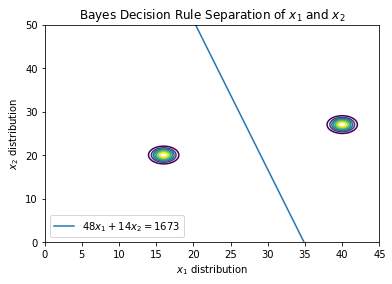

In [43]:
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
u0 = np.array((16, 20)) # class 0
u1 = np.array((40, 27)) # class 1
cov = np.identity(2)
pxc0 = multivariate_normal(u0, cov)
pxc1 = multivariate_normal(u1, cov)
x = np.linspace(0,45,500)
y = np.linspace(0,40,500)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y
plt.contour(X,Y, pxc0.pdf(pos))
plt.contour(X,Y, pxc1.pdf(pos))
plt.title("Bayes Decision Rule Separation of $ x_{1} $ and $ x_{2} $")
plt.xlabel("$ x_{1} $ distribution")
plt.ylabel("$ x_{2} $ distribution")
plt.plot(x, 1673/14 - 48*x/14, label="$ 48x_{1} + 14x_{2} = 1673 $")
plt.ylim((0,50))
plt.legend(loc=3)
plt.show()

# Question 1 - Reject Option (20 Points)


For the Loss matrix given below, compute  the range of P(C1|x) where (i) It is best to call "Class 1", and (ii) where it is best to take the reject option.

In [6]:
import pandas as pd
data = [["C1", 0, 6, 2], ["C2", 4, 0, 2]]
df = pd.DataFrame(data, columns=["Truth", "Decision C1", "Decision C2", "Decision Reject"])
df.set_index("Truth")

,Decision C1,Decision C2,Decision Reject
Truth,,,
C1,0,6,2
C2,4,0,2


In [45]:
alpha = np.linspace(0,1,500)

In [68]:
call_class1 = alpha*(0) + (1-alpha)*4
call_class2 = alpha*(6) + (1-alpha)*0
reject = 1 - (2/((1-alpha)*4))

/home/daniel/Documents/Fall_2018/Data_Mining/data_science_principles/.env/lib/python3.5/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


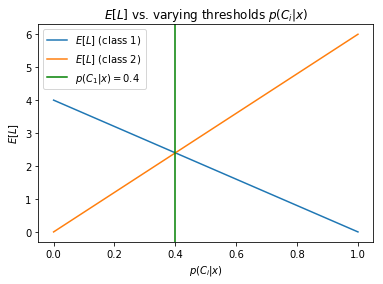

In [66]:
plt.plot(alpha, call_class1, label="$ E[L] $ (class 1)")
plt.plot(alpha, call_class2, label="$ E[L] $ (class 2)")
plt.xlabel("$ p(C_{i}|x) $")
plt.ylabel("$ E[L] $")
plt.axvline(x=0.4, color='g', label="$ p(C_{1}|x) = 0.4 $")
plt.title("$ E[L] $ vs. varying thresholds $ p(C_{i}|x) $")
plt.legend()
plt.show()


Given the above graph, it is *cheaper* to call it class 1 when $ p(C_{i}|x) > 0.4$

## Answer

# Question 2 - Concepts (15 pts)

1. (3+3+4 pts) Briefly describe what you understand by a Lift curve/chart? How is it similar to an ROC curve and in what way is it different? Provide an example where you might prefer using Lift (for a certain decile) over AUROC (AUC) as a point measure of the performance of your classifier. (Point measure means evaluation using a single numeric value.)


2. (5 pts) Explain what it means to calibrate a classifier. Give an example of an application where having a well calibrated model is important, and it is not enough to just estimate what the most likely class label is for a given data point.

## Answer

# Question 3 - MNIST Classification (20 pts)

In this problem, you will classify between digits 8 and 9 of the MNIST dataset using Logistic Regression, Naive Bayes, and MLP. The code below loads the dataset, splits it into training and testing sets, and extracts the images containing either 8 or 9. The modules you will need from scikit-learn are loaded for you.

1. Train Logistic Regression, (Gaussian) Naive Bayes, and MLP classifiers. Extract the probability of the class being 'Digit 8' or 'Digit 9' for every row.

2. (6 pts) Use this to plot the receiver operating characteristic (ROC) curve. (one figure for all 3 models, with a label for each line)

3. (6 pts) Report the area under the ROC curve (AUC) and the accuracy for each model.

4. (6 pts)  For each of the 3 models, show a scatterplot of the obtained posterior probability estimates  vs. ground truth label value, for the data points in the test set. 

5. (2 pts) What do you notice about the distribution of the Naive Bayes estimated posterior probability values compared to the estimates from the other two models? 

In [2]:
# Alternatively, if you have trouble running fetch_mldata(), you can run this cell to get X_train, y_train, X_test, and y_test
# I.e., run this cell OR the above 3 to continue with answering this problem.

%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
import numpy as np
import matplotlib.pyplot as plt
import pickle

with open('q3_data.pickle', 'rb') as handle:
    data1 = pickle.load(handle)

X_train = data1['X_train']
y_train = data1['y_train']
X_test = data1['X_test']
y_test = data1['y_test']

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(11742, 784) (11742,) (2041, 784) (2041,)


In [4]:
digits = [8, 9]
idx = (y_train == digits[0]) + (y_train==digits[1])
X_train = X_train[idx]
y_train = y_train[idx]
y_train = (y_train-digits[0])

idx = (y_test == digits[0]) + (y_test==digits[1])
X_test = X_test[idx]
y_test = y_test[idx]
y_test = (y_test-digits[0])

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(0, 784) (0,) (0, 784) (0,)
